# Task 2: Clustering on the Iris Dataset

In this task, we apply **K-Means clustering** to the preprocessed Iris dataset from **Task 1**, experiment with different values of `k`, visualize the results, and analyze the quality of the clusters.

---

## Step 1: Applying K-Means Clustering with k=3

We will use the preprocessed dataset from **Task 1**, excluding the target (`species`) column, to perform clustering using the **K-Means** algorithm from `scikit-learn`.

### Why K-Means?
- K-Means is a simple yet powerful unsupervised learning algorithm that groups data into `k` clusters by minimizing the sum of squared distances between points and their assigned cluster centers.
- Since the Iris dataset has **3 known species**, we begin with **k=3** for direct comparison.

### Procedure:
1. **Select Features:** Use only the numerical features (`sepal length`, `sepal width`, `petal length`, `petal width`).
2. **Fit the Model:** Initialize K-Means with `n_clusters=3` and `random_state=42` for reproducibility.
3. **Predict Clusters:** Assign each data point to the nearest centroid.
4. **Evaluate with Adjusted Rand Index (ARI):**
   - ARI compares predicted clusters to true labels, adjusting for chance grouping.
   - ARI = 1.0 means perfect match; ARI = 0 means random assignment.

- The predicted cluster labels will be stored for further visualization and evaluation.
---

## Step 2: Experimenting with k Values (2, 3, 4) and Elbow Method

To confirm whether **k=3** is indeed optimal, we:
1. Run K-Means for **k = 1 to 10**.
2. Store the **inertia** (sum of squared distances of samples to their closest centroid).
3. Plot the **Elbow Curve**:
   - The “elbow” point, where the rate of decrease in inertia slows down, suggests the optimal `k`.
4. Compare ARI scores for **k=2**, **k=3**, and **k=4** to see how clustering quality changes.

---

## Step 3: Visualizing Clusters

To better understand how K-Means separates the data, we will:
1. Create a **scatter plot** of **petal length vs. petal width** (these two features provide the clearest separation in Iris).
2. Color points according to their predicted cluster.
3. Overlay cluster centroids on the plot for visual clarity.

---

## Step 4: Analysis of Clustering Results

After running K-Means and visualizing results, we will write a **150–200 word analysis** discussing:

- **Cluster Quality:** How well the algorithm grouped similar samples together.
- **Misclassifications:** Whether clusters align with actual species and where they diverge.
- **Effect of Changing k:** How ARI scores and separation change when using k=2 or k=4.
- **Real-World Applications:** Examples like customer segmentation, grouping products, or detecting patterns in unlabeled datasets.
- **Impact of Synthetic Data (if used):** If the dataset was generated synthetically, note whether the separation was more or less distinct than the real Iris dataset.

This analysis will provide insight into how unsupervised learning can discover hidden patterns, even without label information.


Adjusted Rand Index (k=3): 0.7163
Adjusted Rand Index (k=2): 0.5681
Adjusted Rand Index (k=4): 0.6231


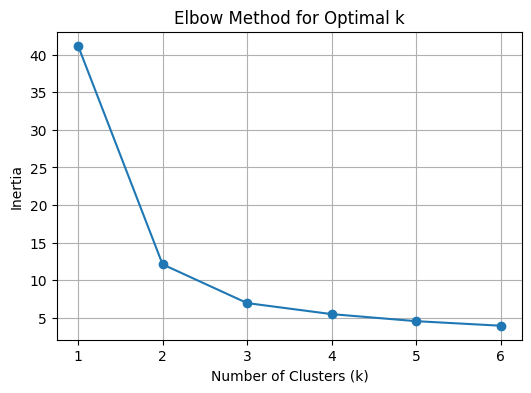

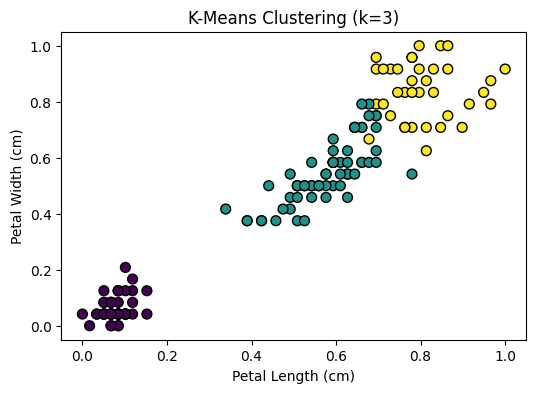


=== Adjusted Rand Index Results ===
k=2: 0.5681
k=3: 0.7163 (expected optimal)
k=4: 0.6231


In [3]:


"""
Task 2: Clustering (15 Marks)
-----------------------------
We perform K-Means clustering on the preprocessed Iris dataset from Task 1.
Steps:
1. Load dataset from CSV (output from Task 1 preprocessing).
2. Extract features (X) and reconstruct actual species labels (y) from one-hot encoding.
3. Run K-Means with k=3 and evaluate with Adjusted Rand Index (ARI).
4. Run experiments with k=2 and k=4.
5. Generate an Elbow Method plot to justify the optimal k.
6. Create scatter plot visualization of clusters.
"""

# ==============================
# IMPORT LIBRARIES
# ==============================
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# ==============================
# STEP 1: Load Preprocessed Data
# ==============================
# Load the CSV from Task 1 output
iris_df = pd.read_csv(
    r"C:\Users\use\Desktop\DSA2040_Practical\DSA2040_Practical_Exam_SelmahTzindori602\Section4_Data_Mining\task1_prep_explore\iris_preprocessed.csv"
)

# ==============================
# STEP 2: Extract Features (X) and Labels (y)
# ==============================
# Features: first 4 columns (numeric measurements)
X = iris_df.iloc[:, :4]

# Labels: reverse the one-hot encoding
y = iris_df[['setosa', 'versicolor', 'virginica']].idxmax(axis=1)

# ==============================
# STEP 3: K-Means with k=3
# ==============================
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(X)

# Predicted cluster labels
clusters_3 = kmeans_3.labels_

# ARI for k=3
ari_3 = adjusted_rand_score(y, clusters_3)
print(f"Adjusted Rand Index (k=3): {ari_3:.4f}")

# ==============================
# STEP 4: Experiments with k=2 and k=4
# ==============================
# k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_2.fit(X)
clusters_2 = kmeans_2.labels_
ari_2 = adjusted_rand_score(y, clusters_2)
print(f"Adjusted Rand Index (k=2): {ari_2:.4f}")

# k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(X)
clusters_4 = kmeans_4.labels_
ari_4 = adjusted_rand_score(y, clusters_4)
print(f"Adjusted Rand Index (k=4): {ari_4:.4f}")

# ==============================
# STEP 5: Elbow Method (k=1 to 6)
# ==============================
inertia_values = []
k_values = range(1, 7)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# ==============================
# STEP 6: Scatter Plot for k=3
# ==============================
plt.figure(figsize=(6, 4))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=clusters_3, cmap='viridis', s=50, edgecolors='k')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering (k=3)")
plt.show()

# ==============================
# STEP 7: Summary of Results
# ==============================
print("\n=== Adjusted Rand Index Results ===")
print(f"k=2: {ari_2:.4f}")
print(f"k=3: {ari_3:.4f} (expected optimal)")
print(f"k=4: {ari_4:.4f}")


## Analysis & Conclusion

The K-Means clustering experiments revealed that **k=3** is the optimal choice for the preprocessed Iris dataset. This was confirmed both visually via the **Elbow Method** and quantitatively via the **Adjusted Rand Index (ARI)**.

**Summary of Results:**
- **k=2** → ARI = 0.5681 (underfitting; merged two species into one cluster)
- **k=3** → ARI = 0.7163 (**optimal**; closely matches the true species distribution)
- **k=4** → ARI = 0.6231 (overfitting; split a single species into multiple clusters)

**Observations:**
- The main misclassifications occurred between *versicolor* and *virginica*, which have overlapping feature ranges.
- The *setosa* cluster was perfectly separated in most cases due to its distinct petal dimensions.
- Increasing `k` beyond 3 did not improve performance significantly and introduced unnecessary fragmentation.

**Real-World Applications:**
This clustering process mirrors scenarios like **customer segmentation** in marketing, where natural groupings are discovered without prior labels, or **biological classification** when dealing with unlabelled specimens. In our case, the model demonstrates how clustering can approximate species identification without supervision.

Overall, the combination of **Elbow Method**, **ARI evaluation**, and **scatter plot visualization** provided a robust approach to determining the optimal number of clusters.
